In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r'C:\Users\Dell\student-mat.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [6]:
df.shape

(395, 33)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [9]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

<AxesSubplot:>

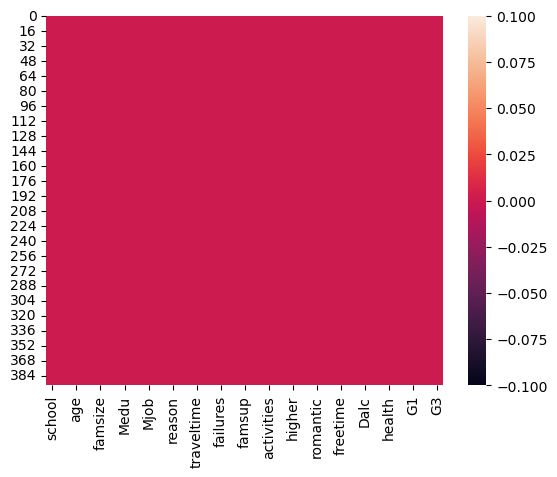

In [10]:
sns.heatmap(df.isnull())

<AxesSubplot:>

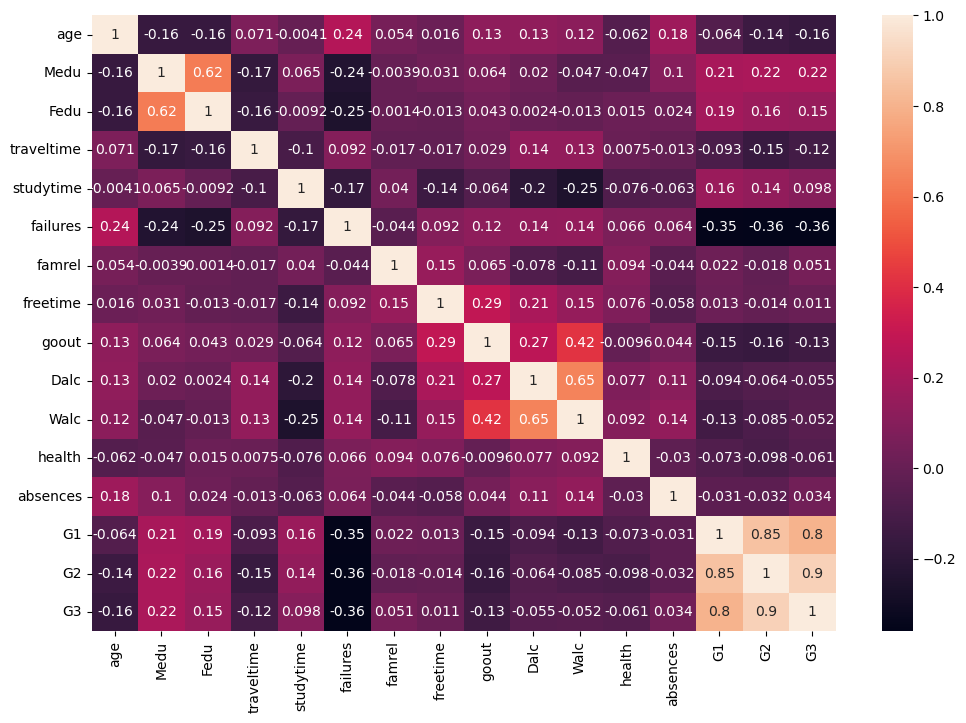

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

# EDA

Text(0.5, 0, 'Weekly alcohol consumption')

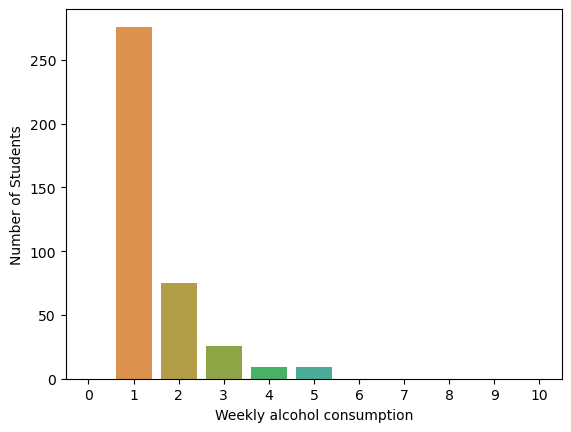

In [15]:
# There is no student who does not consume alcohol. However, all students at least 2 times in a week consume alcohol.
list = []
for i in range(11):
    list.append(len(df[df.Dalc == i]))
ax = sns.barplot(x = [0,1,2,3,4,5,6,7,8,9,10], y = list)
plt.ylabel('Number of Students')
plt.xlabel('Weekly alcohol consumption')

### Final Exam Scores According to Students' alcohol consumption

Text(0.5, 0, 'Students grade distribution according to weekly alcohol consumption')

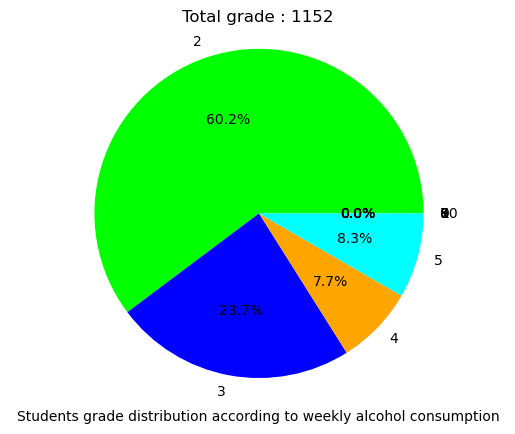

In [18]:
labels = ['2','3','4','5','6','7','8','9','10']
colors = ['lime','blue','orange','cyan','grey','purple','brown','red','darksalmon']
explode = [0,0,0,0,0,0,0,0,0]
sizes = []
for i in range(2,11):
    sizes.append(sum(df[df.Dalc == i].G3))
total_grade = sum(sizes)
average = total_grade/float(len(df))
plt.pie(sizes,explode=explode,colors=colors,labels=labels,autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Total grade : '+str(total_grade))
plt.xlabel('Students grade distribution according to weekly alcohol consumption')

Well, it looks like students who consume alcohol 2 times in a week more successful than others. However, it actually cannot be understood from this graph. Because number of students who consume alcohol 2 times in a week more than others. Therefore, lets look at swarm plot to understand whether alcohol affects the success or not.


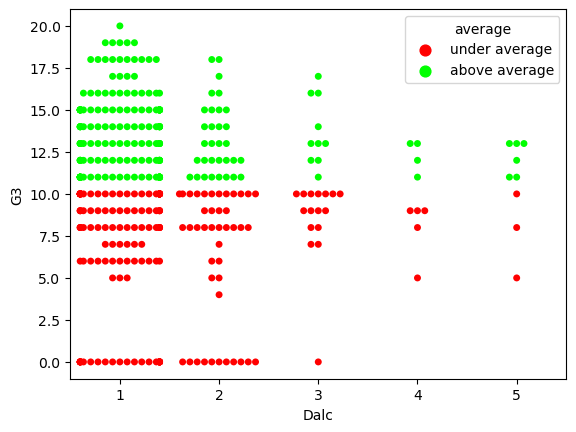

In [23]:
ave = sum(df.G3)/float(len(df))
df['ave_line'] = ave
df['average'] = ['above average' if i > ave else 'under average' for i in df.G3]
sns.swarmplot(x='Dalc', y = 'G3', hue = 'average',data= df,palette={'above average':'lime', 'under average': 'red'})
plt.savefig('graph.png')

<AxesSubplot:xlabel='school', ylabel='count'>

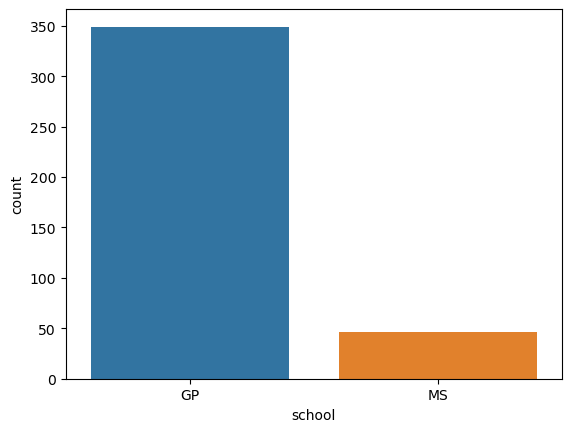

In [27]:
# count of school 
sns.countplot(x='school',data=df)

<AxesSubplot:xlabel='sex', ylabel='count'>

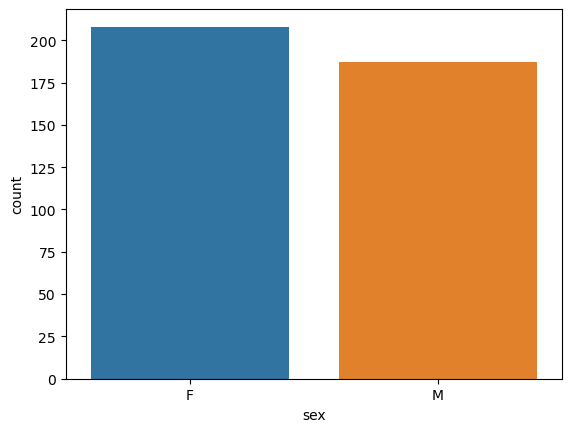

In [28]:
# count of male and female
sns.countplot(x='sex',data=df)

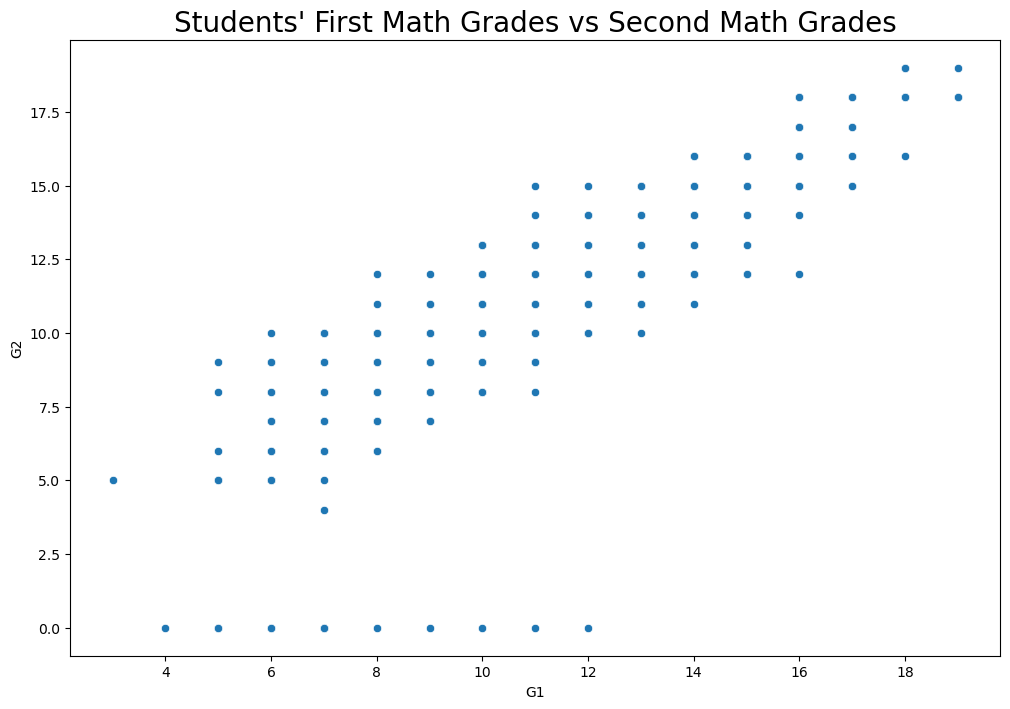

In [29]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df["G1"], y=df["G2"])
plt.title("Students' First Math Grades vs Second Math Grades",size=20)
plt.show()
